In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Sat Feb 21 09:15:07 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

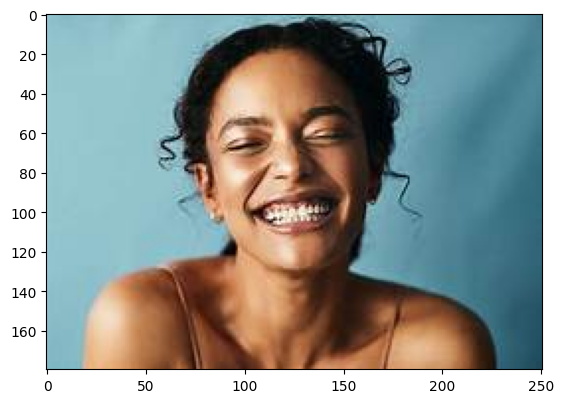

In [4]:
img = image.load_img('/content/drive/MyDrive/CNN-happy-sad/training/happy/img1.jpg')
plt.imshow(img)

array([[[214, 203, 153],
        [210, 199, 149],
        [207, 196, 146],
        ...,
        [150, 133,  77],
        [150, 133,  77],
        [150, 133,  77]],

       [[212, 201, 151],
        [209, 198, 148],
        [206, 195, 145],
        ...,
        [148, 131,  75],
        [148, 131,  75],
        [148, 131,  75]],

       [[211, 200, 150],
        [208, 197, 147],
        [204, 193, 143],
        ...,
        [145, 128,  72],
        [145, 128,  72],
        [145, 128,  72]],

       ...,

       [[197, 186, 129],
        [197, 186, 129],
        [196, 185, 128],
        ...,
        [ 89,  73,  31],
        [ 89,  73,  31],
        [ 89,  72,  33]],

       [[198, 187, 130],
        [197, 186, 129],
        [196, 185, 128],
        ...,
        [ 89,  73,  31],
        [ 89,  73,  31],
        [ 89,  72,  33]],

       [[198, 187, 130],
        [197, 186, 129],
        [196, 185, 128],
        ...,
        [ 90,  74,  32],
        [ 90,  74,  32],
        [ 90,  73,  34]]], dtype=uint8)
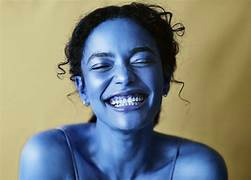

In [5]:
i1=cv2.imread('/content/drive/MyDrive/CNN-happy-sad/training/happy/img1.jpg')
i1

In [6]:
i1.shape

(180, 251, 3)

In [7]:
train=ImageDataGenerator(rescale=1/200)
validation=ImageDataGenerator(rescale=1/200)

In [8]:
train_dataset=train.flow_from_directory('/content/drive/MyDrive/CNN-happy-sad/training',target_size=(200,200),batch_size=32,class_mode='binary')
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/CNN-happy-sad/validation',target_size=(200,200),batch_size=32,class_mode='binary')

Found 50 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [9]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [11]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss='binary_crossentropy',
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
metrics=['accuracy'])

In [13]:
model.fit=model.fit(train_dataset,epochs=25)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.3778 - loss: 7.1522
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.5000 - loss: 4.0044
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4258 - loss: 0.7046
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.5696 - loss: 0.6741
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.5689 - loss: 0.7309
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5000 - loss: 0.6727
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8175 - loss: 0.6235
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.5208 - loss: 0.6341
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.6037 - loss: 0.5717
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8679 - loss: 0.5077
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.7108 - loss: 0.5982
Epoch 12/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 336ms/step - accuracy: 0.5742 - loss: 0.8

In [14]:
dir_path='/content/drive/MyDrive/CNN-happy-sad/testing'
for i in os.listdir(dir_path):
  print(i)

img14.jpg
img15.jpg
img22.jpg
img23.jpg
img24.jpg
img25.jpg
image6.jpg
image7.jpg
image8.jpg
image9.jpg
image10.jpg
image11.jpg
image12.jpg
image25.jpg


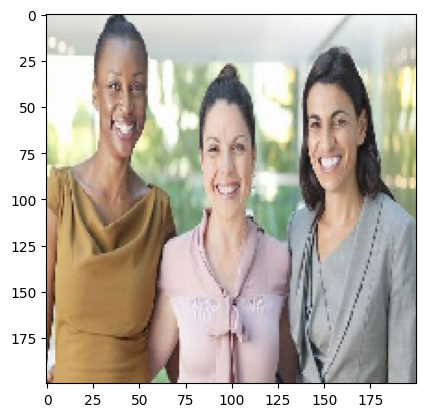

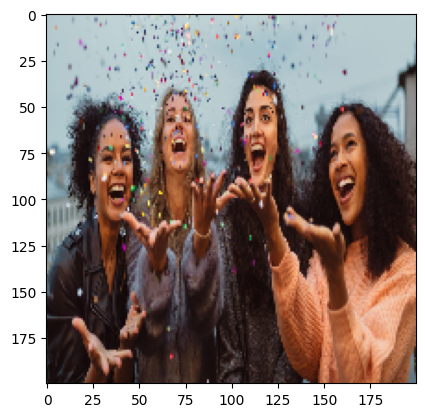

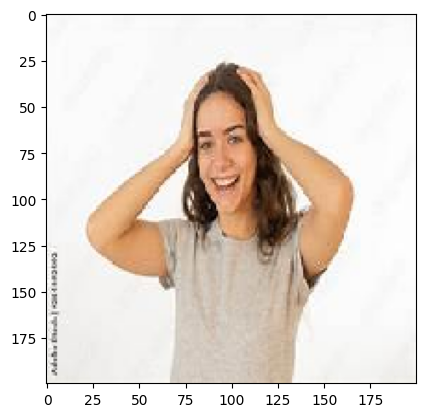

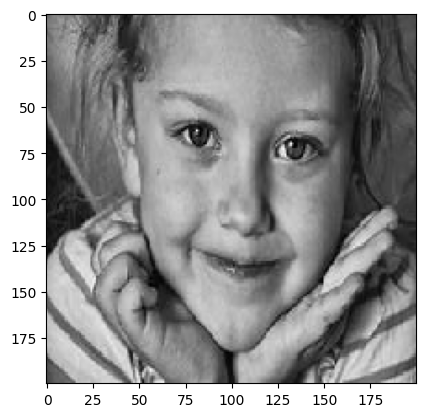

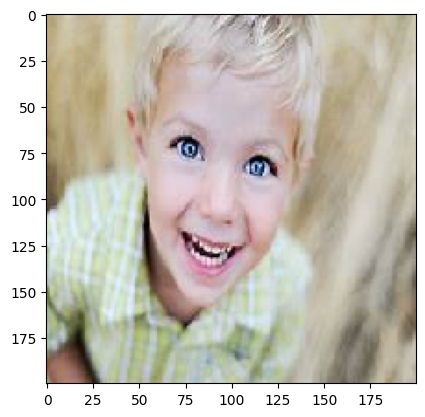

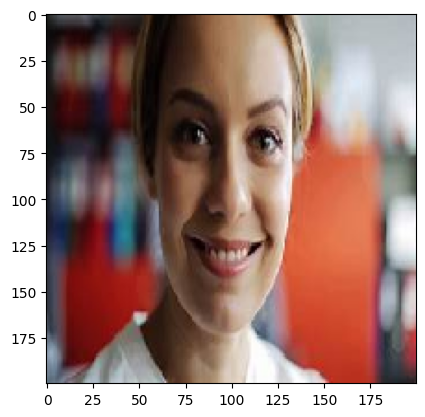

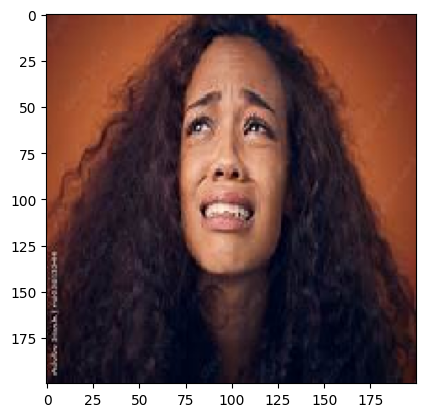

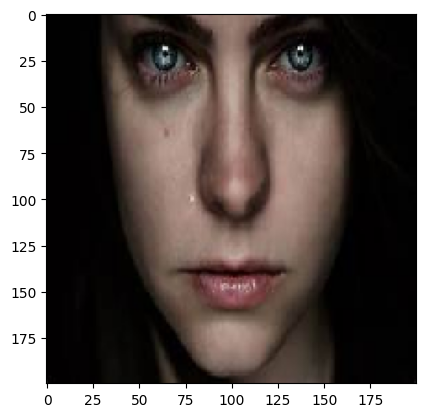

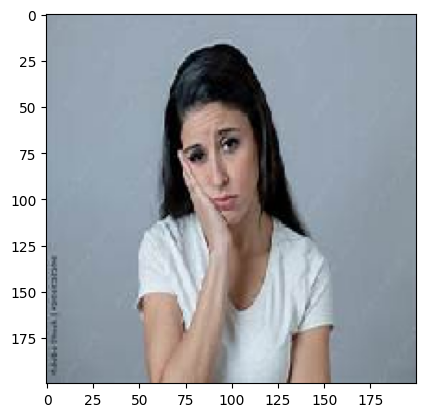

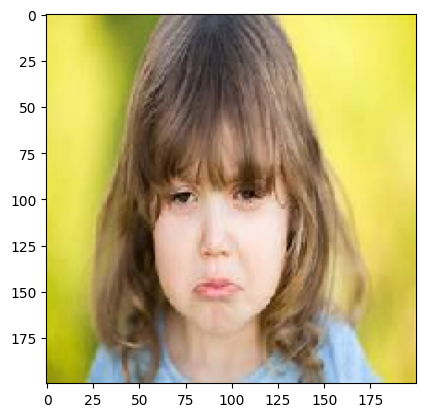

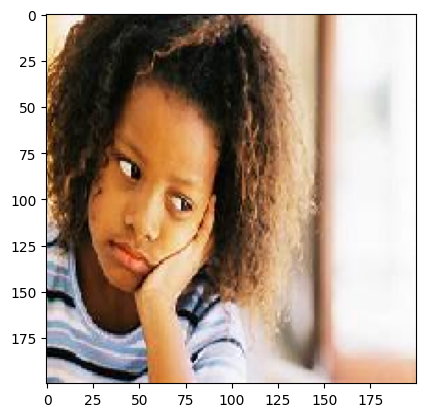

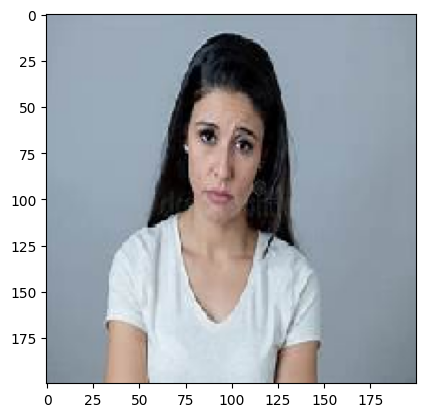

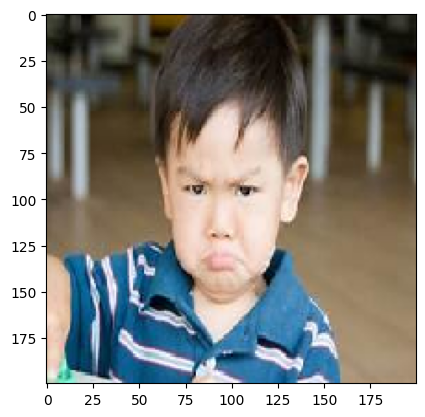

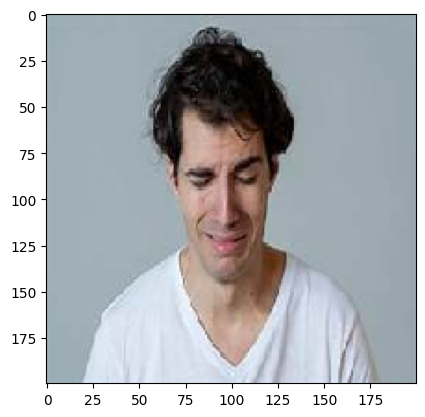

In [15]:
dir_path='/content/drive/MyDrive/CNN-happy-sad/testing'
for i in os.listdir(dir_path):
  img=image.load_img(dir_path+'//'+i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

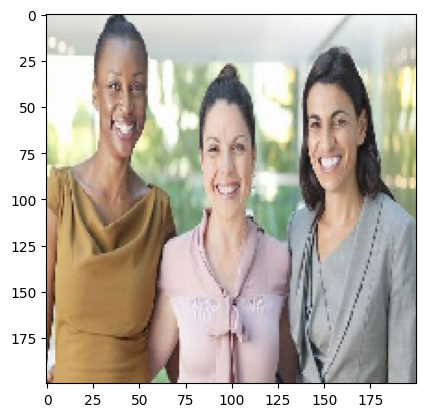

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step
i am happy


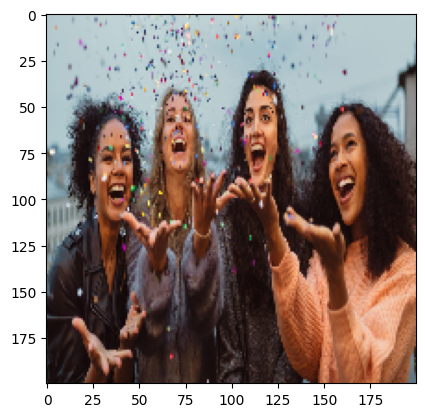

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
i am happy


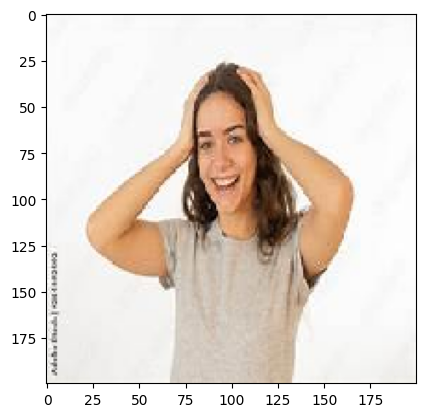

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
i am happy


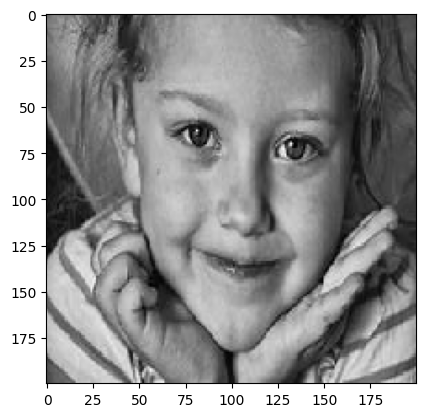

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
i am happy


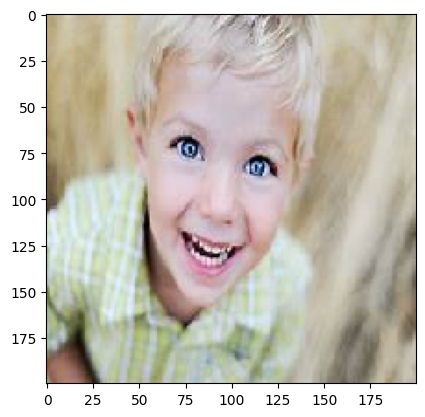

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
i am happy


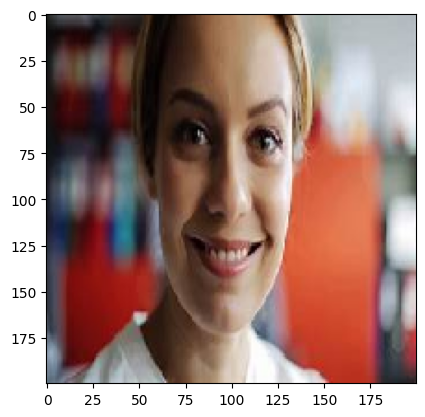

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
i am happy


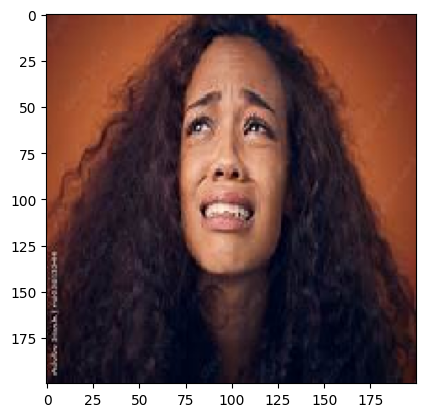

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
i am sad


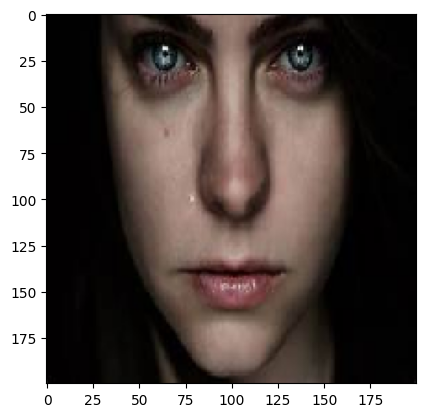

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
i am sad


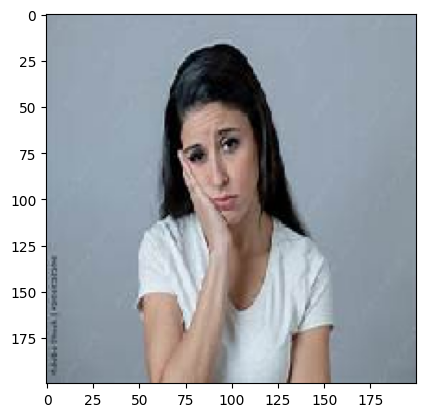

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
i am sad


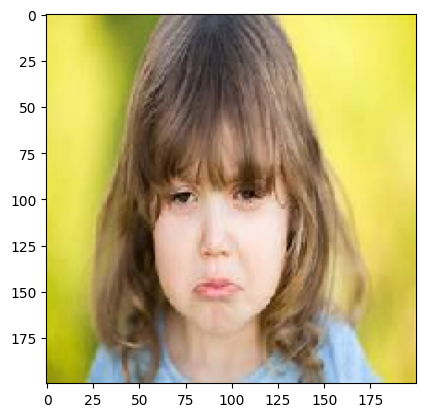

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
i am sad


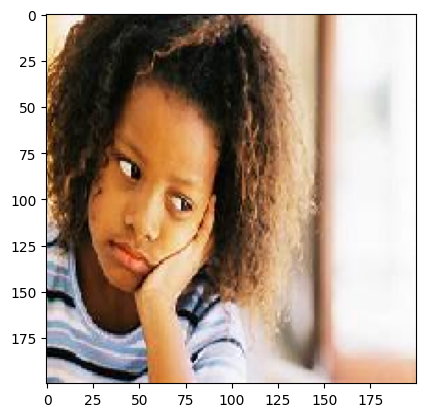

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
i am sad


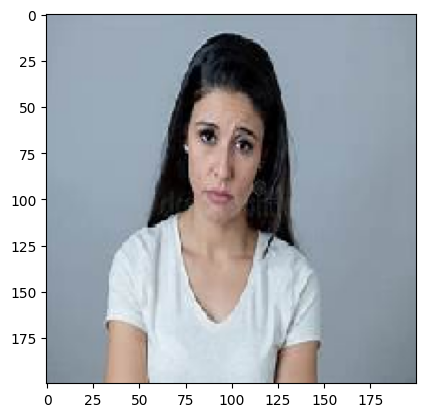

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
i am sad


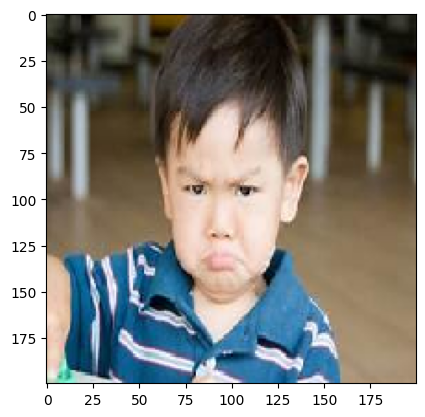

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
i am sad


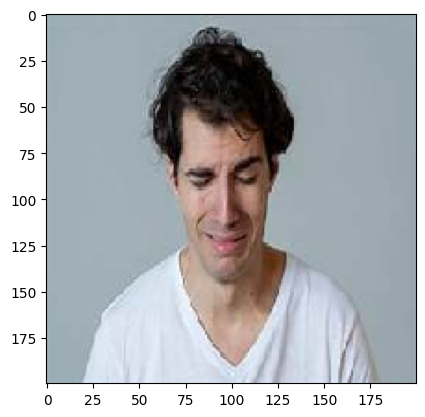

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
i am sad


In [16]:
dir_path='/content/drive/MyDrive/CNN-happy-sad/testing'
for i in os.listdir(dir_path):
  img=image.load_img(dir_path+'//'+i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])

  val=model.predict(images)
  if val==0:
    print('i am happy')
  else:
    print('i am sad')

In [17]:
import gradio as gr
from PIL import Image
import numpy as np

def predict_mood(image):
    # Resize the image to (200, 200) as expected by the model
    img = image.resize((200, 200))
    # Convert the image to a numpy array
    x = np.array(img)
    # Expand dimensions to create a batch of 1 image
    x = np.expand_dims(x, axis=0)
    # Normalize the image (if the model was trained with normalized inputs)
    # The model was trained with rescale=1/200, so we should apply the same scaling here.
    x = x / 200.0
    # Make prediction
    val = model.predict(x)[0][0]
    # Interpret the prediction
    if val < 0.5:
        return 'Happy'
    else:
        return 'Not Happy'

In [18]:
iface=gr.Interface(fn=predict_mood,
                   inputs=gr.Image(type='pil',label="Upload an image"),
                   outputs=gr.Text(label="predicted Mood"),
                   title="Happy-Sad Classifier",
                   description="Upload and image to classify if the person is happy")
iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://821c10fe425b6b2868.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
